In [16]:
import stad
import pandas as pd
import numpy as np
import os

In [2]:

## Load the data
url = 'https://gist.githubusercontent.com/jandot/a84c0505cdc8008a6e5ae5032532a39f/raw/d834527117fd204d33486998d10290251354d013/five_circles.csv'
data = pd.read_csv(url, header=0)

## Extract the values we want to use in our distance, the lens, and optional features
values = data[['x','y']].values.tolist()
lens = data['hue'].map(lambda x: stad.hex_to_hsv(x)[0]).values
features={
    'x': data['x'].values.tolist(),
    'y': data['y'].values.tolist(),
    'colour': data['hue'].values.tolist()
}
highD_dist_matrix = stad.calculate_highD_dist_matrix(values)
# return (highD_dist_matrix, lens, features)

## Create the distance matrix in the high_dimensional space. This can be using
## cosine distance, euclidean, or any other.
highD_dist_matrix = stad.calculate_highD_dist_matrix(values)

## Run STAD and show the result
g = stad.run_stad(highD_dist_matrix, lens=lens, features=features)
stad.draw_stad(g)

Launching server at http://localhost:61140


In [3]:
lens

array([0.48209366, 0.45959596, 0.44029851, 0.49122807, 0.52083333,
       0.47244094, 0.54208754, 0.45273632, 0.56989247, 0.41731266,
       0.59689922, 0.38235294, 0.63596491, 0.31432749, 0.68518519,
       0.25768322, 0.72435897, 0.21696252, 0.75813008, 0.18461538,
       0.78769841, 0.15801887, 0.78313253, 0.15123457, 0.74593496,
       0.17159278, 0.71052632, 0.20165746, 0.66908213, 0.24111111,
       0.62083333, 0.28763441, 0.58712121, 0.35585586, 0.55964912,
       0.4047619 , 0.53465347, 0.51587302, 0.49122807, 0.49122807,
       0.46564885, 0.51428571, 0.43905473, 0.53465347, 0.40813648,
       0.55729167, 0.35285285, 0.58712121, 0.29722222, 0.61875   ,
       0.24662162, 0.65952381, 0.20599251, 0.70833333, 0.17666667,
       0.74074074, 0.15342679, 0.77235772, 0.15420561, 0.79960317,
       0.17922948, 0.76422764, 0.21072797, 0.73662551, 0.24942529,
       0.69594595, 0.29132791, 0.64840183, 0.36666667, 0.61382114,
       0.40813648, 0.57777778, 0.44029851, 0.55154639, 0.46310

In [4]:
# VODS disciplines names:
discipline_names =['Mathematical sciences',
'Information and computing sciences',
'Physical sciences',
'Chemical sciences',
'Earth sciences',
'Biological sciences',
'Environmental sciences',
'Other natural sciences',
'Civil and building engineering',
'Electrical and electronic engineering',
'Mechanical and manufacturing engineering',
'(Bio)chemical engineering',
'Materials engineering',
'(Bio)medical engineering',
'Biotechnology, bio-engineering and biosystems engineering',
'Computer engineering, information technology and mathematical engineering',
'Other engineering and technology',
'Basic sciences',
'Clinical sciences',
'Health sciences',
'Paramedical sciences',
'Pharmaceutical sciences',
'Translational sciences',
'Other medical and health sciences',
'Agriculture, forestry, fisheries and allied sciences',
'Veterinary sciences',
'Other agricultural, veterinary and food sciences',
'Psychology and cognitive sciences',
'Economics and business',
'Pedagogical and educational sciences',
'Sociology and anthropology',
'Law and legal studies',
'Political sciences',
'Social and economic geography',
'Media and communications',
'Other social sciences',
'History and archaeology',
'Languages and literary studies',
'Philosophy, ethics and religious studies',
'Arts',
'Other humanities and the arts',
'General and logistic services']

In [5]:
# VODS disciplines codes:
discipline_codes=['0101',
'0102',
'0103',
'0104',
'0105',
'0106',
'0107',
'0199',
'0201',
'0202',
'0203',
'0204',
'0205',
'0206',
'0207',
'0208',
'0299',
'0301',
'0302',
'0303',
'0304',
'0305',
'0306',
'0399',
'0401',
'0402',
'0499',
'0501',
'0502',
'0503',
'0504',
'0505',
'0506',
'0507',
'0508',
'0599',
'0601',
'0602',
'0603',
'0604',
'0699',
'0700']


In [6]:
feat = {'codes': discipline_codes, 'disciplines':  discipline_names}
feat_41 =  {'codes': discipline_codes[:-1], 'disciplines':  discipline_names[:-1]}

In [7]:
from ast import literal_eval
lens1=[]
for code in discipline_codes:
    n= literal_eval(code[1:2])
    if n <= 6:
        lens1 = lens1 + [1/6*n]
    elif n == 6:
        lens1 = lens1 + [0.55]
    elif n == 7:
        lens1 = lens1 + [0]
lens1=np.array(lens1)

In [8]:
from ast import literal_eval
lens1=[]
for code in discipline_codes:
    n= literal_eval(code[1:2])
    if n == 1:
        lens1 = lens1 + [0.1]
    if n == 2:
        lens1 = lens1 + [0.2]
    if n == 3:
        lens1 = lens1 + [0.3]
    if n == 4:
        lens1 = lens1 + [0.4]
    if n == 5:
        lens1 = lens1 + [0.5]
    elif n == 6:
        lens1 = lens1 + [0.9]
    elif n == 7:
        lens1 = lens1 + [0]

In [17]:
# load distance matrix M (between disciplines)
count_type = 'disc_in_a_person'
data = 'pub_2014'
cur_path = os.getcwd()
filename ='dm_cosine_' + count_type + '_' + data+  '.txt'
new_path = os.path.relpath('..\\2_Discipline_distances/'+filename, cur_path)
M= np.loadtxt(new_path)

g = stad.run_stad(M, lens=lens1,  features=feat)
stad.draw_stad(g)

In [19]:
# load distance matrix M (between disciplines)
count_type = 'colab'
data = 'projects'
cur_path = os.getcwd()
filename ='dm_cosine_' + count_type + '_' + data+  '.txt'
new_path = os.path.relpath('..\\2_Discipline_distances/'+filename, cur_path)
M = np.loadtxt(new_path)

g = stad.run_stad(M, lens=lens1,  features=feat)
stad.draw_stad(g)

Launching server at http://localhost:61182


In [20]:
# load distance matrix M (between disciplines)
count_type = 'colab'
data = 'projects'
cur_path = os.getcwd()
filename ='dm_jaccard_' + count_type + '_' + data+  '.txt'
new_path = os.path.relpath('..\\2_Discipline_distances/'+filename, cur_path)
M = np.loadtxt(new_path)

g = stad.run_stad(M, lens=lens1,  features=feat)
stad.draw_stad(g)

Launching server at http://localhost:61201


In [11]:
#importing necessary packages
import numpy as np  
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances #jaccard diss.
from sklearn import manifold  # multidimensional scaling
foods_binary = np.random.randint(2, size=(100, 10)) #initial dataset
print(foods_binary.shape)



(100, 10)


In [12]:
dis_matrix = pairwise_distances(foods_binary, metric = 'jaccard')
print(dis_matrix.shape)

(100, 100)


C:\Users\lucp11051\Anaconda3\lib\site-packages\sklearn\metrics\pairwise.py:1765: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


In [13]:
dis_matrix

array([[0.        , 0.66666667, 0.4       , ..., 0.71428571, 1.        ,
        0.66666667],
       [0.66666667, 0.        , 0.57142857, ..., 0.16666667, 0.71428571,
        0.33333333],
       [0.4       , 0.57142857, 0.        , ..., 0.625     , 0.71428571,
        0.33333333],
       ...,
       [0.71428571, 0.16666667, 0.625     , ..., 0.        , 0.75      ,
        0.42857143],
       [1.        , 0.71428571, 0.71428571, ..., 0.75      , 0.        ,
        0.71428571],
       [0.66666667, 0.33333333, 0.33333333, ..., 0.42857143, 0.71428571,
        0.        ]])

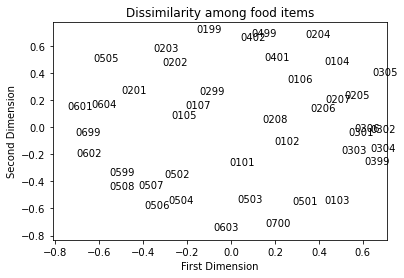

In [14]:
mds_model = manifold.MDS(n_components = 2, random_state = 123,
    dissimilarity = 'precomputed')
mds_fit = mds_model.fit(M)  
mds_coords = mds_model.fit_transform(M) 
                                                                                                                                  
food_names = discipline_codes
plt.figure()
plt.scatter(mds_coords[:,0],mds_coords[:,1],
    facecolors = 'none', edgecolors = 'none')  # points in white (invisible)
labels = food_names
for label, x, y in zip(labels, mds_coords[:,0], mds_coords[:,1]):
    plt.annotate(label, (x,y), xycoords = 'data')
plt.xlabel('First Dimension')
plt.ylabel('Second Dimension')
plt.title('Dissimilarity among food items')    
plt.show()